In [33]:
# Min model used for training
import pandas as pd
from pandas import DataFrame
import math
import os
from tensorflow import keras
from keras import layers, models, optimizers
import numpy as np
from sklearn.utils import shuffle
import dataset
import events
import main

SEGMENT_SIZE = 24
# SEGMENT_SIZE = 32
COLUMN = 'weight_perc_l3'
# COLUMN = 'h_perc_l10'
# SRC_DIR = 'dataset/alright_train_20m'
SRC_DIR = 'dataset/bobo/swarming_'+ '20m'

BATCH_SIZE = 24
EPOCHS = 25

In [34]:
x, y = dataset.dir_to_split(SRC_DIR, COLUMN, SEGMENT_SIZE)
x[np.abs(x) < .005] = 0.0002
y[np.std(x[:, :, 0], axis=1) <= 0.004] = 0
x, y = dataset.balanceXandY(x, y)

print(f"Shapes: {x.shape}, {y.shape}")
print(f"1s: {np.mean(y == 1) * 100:.2f}%")

Processing:  dataset/bobo/swarming_20m/76_2020-06-28 104940--0.csv
Margin:  3
Swarming at 60 -> 20
Swarming at 61 -> 19
Swarming at 62 -> 18
Swarming at 63 -> 17
Swarming at 64 -> 16
Swarming at 65 -> 15
Swarming at 66 -> 14
Swarming at 67 -> 13
Swarming at 68 -> 12
Swarming at 69 -> 11
Swarming at 70 -> 10
Swarming at 71 -> 9
Swarming at 72 -> 8
Swarming at 73 -> 7
Swarming at 74 -> 6
Swarming at 75 -> 5
Swarming at 76 -> 4
Processing:  dataset/bobo/swarming_20m/86_2021-06-06 073320--0.csv
Margin:  3
Swarming at 60 -> 20
Swarming at 61 -> 19
Swarming at 62 -> 18
Swarming at 63 -> 17
Swarming at 64 -> 16
Swarming at 65 -> 15
Swarming at 66 -> 14
Swarming at 67 -> 13
Swarming at 68 -> 12
Swarming at 69 -> 11
Swarming at 70 -> 10
Swarming at 71 -> 9
Swarming at 72 -> 8
Swarming at 73 -> 7
Swarming at 74 -> 6
Swarming at 75 -> 5
Swarming at 76 -> 4
Processing:  dataset/bobo/swarming_20m/86_2021-06-06 073320--1.csv
Margin:  3
Swarming at 60 -> 20
Swarming at 61 -> 19
Swarming at 62 -> 18
S

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, BatchNormalization, Dropout, Normalization

train_ration = .75
X_train, X_test = x[:int(len(x) * train_ration)], x[int(len(x) * train_ration):]
Y_train, Y_test = y[:int(len(y) * train_ration)], y[int(len(y) * train_ration):]
print(f"Train 1s: {np.mean(Y_train == 1) * 100:.2f}, Test 1s: {np.mean(Y_test == 1) * 100:.2f}")
model = Sequential([
    LSTM(SEGMENT_SIZE*10, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dropout(0.1),
    Dense(SEGMENT_SIZE*10, activation='relu'),
    # BatchNormalization(),
    # Dropout(0.1),
    # Dense(SEGMENT_SIZE*2, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)


Train 1s: 47.12, Test 1s: 58.57
Epoch 1/25


/Users/oleks/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4195 - loss: 0.6924 - val_accuracy: 0.5429 - val_loss: 0.6901
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7305 - loss: 0.6848 - val_accuracy: 0.9000 - val_loss: 0.6590
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8961 - loss: 0.6396 - val_accuracy: 0.9286 - val_loss: 0.5448
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8368 - loss: 0.5984 - val_accuracy: 0.9429 - val_loss: 0.4568
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9278 - loss: 0.5163 - val_accuracy: 0.9571 - val_loss: 0.4121
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8973 - loss: 0.4164 - val_accuracy: 0.8571 - val_loss: 0.3175
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9123 - loss: 0.2916 - val_accuracy: 0.9143 - val_loss: 0.2775
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9498 - loss: 0.2220 - val_accuracy: 0.9000 - val_loss: 0.3102
Epoch 9/25


Text(0, 0.5, 'Accuracy [%]')

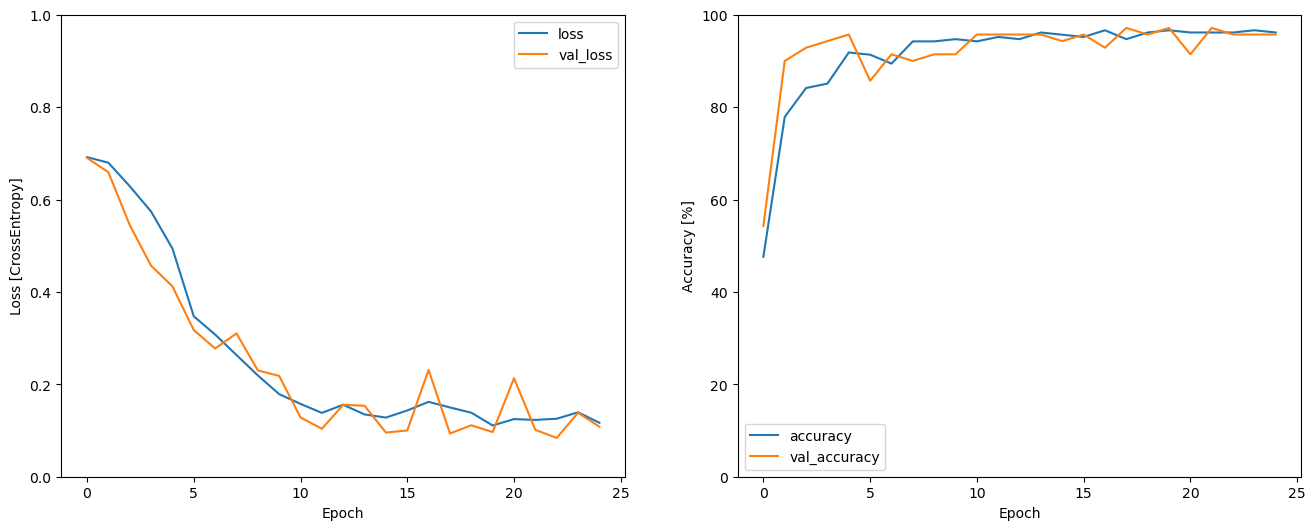

In [36]:
import matplotlib.pyplot as plt

metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
#plt.ylim([0, max(plt.ylim())])
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')
